## Ejercicio breast cancer de sklearn

1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Limpia los datos si es necesario
3. Dibuja con plotly los gráficos que creas necesarios para entender los datos.
4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
5. Intenta superarte en el score cambiando las features de los algoritmos.

In [88]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)

import numpy as np
import seaborn as sns
import pickle

import plotly.offline as py
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [52]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [53]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [54]:
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [55]:
df['target'] = data['target']

**2. Limpia los datos si es necesario**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [57]:
df.nunique().sort_values()

target                       2
worst smoothness           411
mean symmetry              432
mean radius                456
worst radius               457
mean smoothness            474
mean texture               479
worst concave points       492
symmetry error             498
mean fractal dimension     499
worst symmetry             500
concave points error       507
worst texture              511
worst perimeter            514
texture error              519
mean perimeter             522
area error                 528
worst compactness          529
perimeter error            533
concavity error            533
worst fractal dimension    535
mean concavity             537
mean compactness           537
mean area                  539
worst concavity            539
radius error               540
compactness error          541
mean concave points        542
worst area                 544
fractal dimension error    545
smoothness error           547
dtype: int64

In [58]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**3. Dibuja con plotly los gráficos que creas necesarios para entender los datos.**

In [59]:
# import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

radius = go.Histogram(x=df['mean radius'],
                        name='mean radius',
                        marker=dict(color='#ffcdd2'))

cancer = go.Histogram(x=df['target'],
                    name='target',
                    marker=dict(color='blue'))

# trace_gap = go.Bar(x=df.School,
#                 y=df.Gap,
#                 name='Gap',
#                 marker=dict(color='#59606D'))

data = [radius, cancer]#, trace_men, trace_gap]

layout = go.Layout(title="Mean Radius Distribution",
                xaxis=dict(title='Radius (mm)'))

fig = go.Figure(data=data[0], layout=layout)

layout2 = go.Layout(title="Target Distribution",
                xaxis=dict(title='Bad Tumor (Y/N)'))

fig2 = go.Figure(data=data[1], layout=layout2)
iplot(fig, filename='jupyter-styled_bar')
iplot(fig2, filename='jupyter-styled_bar')

In [64]:
ls_cols = list(df.columns)
ls_cols = list(filter(lambda x: 'mean' in x, ls_cols))
# ls_cols = map(lambda x: x.replace('mean ', ''), ls_cols)
# ls_cols = list(ls_cols) + ['target']
ls_cols

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension']

In [65]:
df = df[ls_cols + ['target']].copy()
df.columns = list(map(lambda x: x.replace('mean ', ''), ls_cols)) + ['target']
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [66]:
X = df.drop(columns='target').copy()
y = df['target']

<AxesSubplot:>

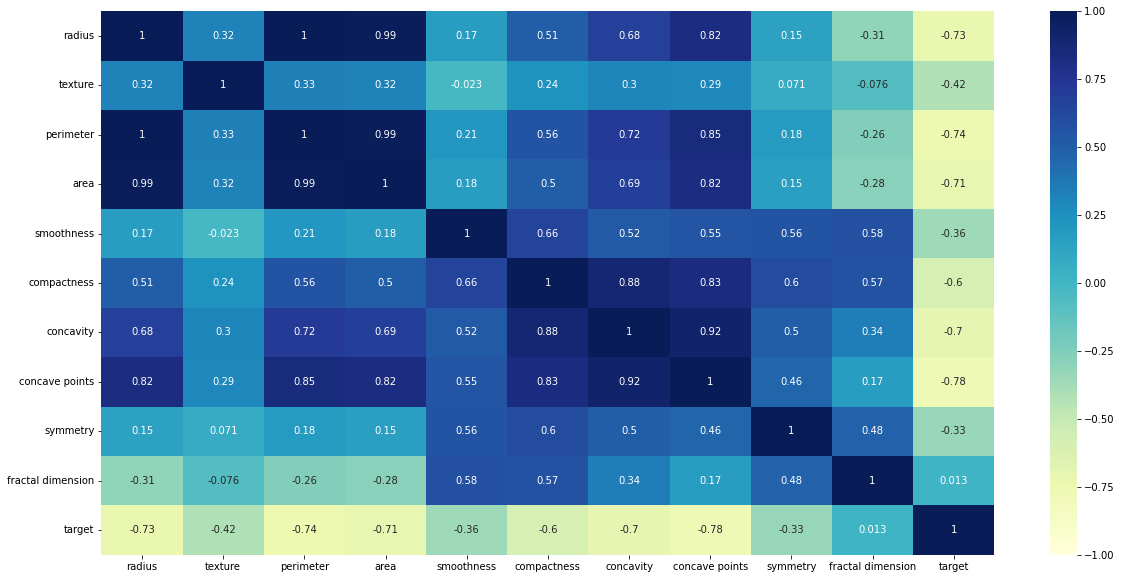

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='YlGnBu')

<AxesSubplot:xlabel='radius', ylabel='area'>

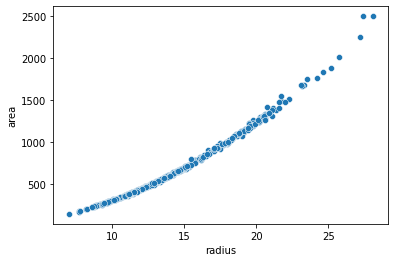

In [75]:
sns.scatterplot(x='radius', y='area', data=df)

<AxesSubplot:>

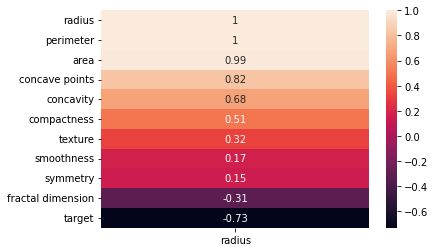

In [80]:
sns.heatmap(df.corr()[['radius']].sort_values(by='radius', ascending=False), annot=True)

<AxesSubplot:>

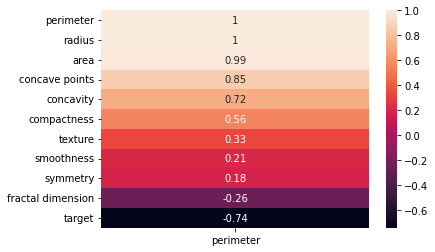

In [82]:
sns.heatmap(df.corr()[['perimeter']].sort_values(by='perimeter', ascending=False), annot=True)

<AxesSubplot:>

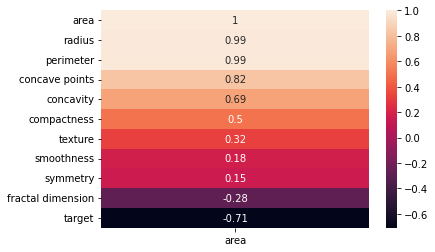

In [83]:
sns.heatmap(df.corr()[['area']].sort_values(by='area', ascending=False), annot=True)

<AxesSubplot:xlabel='perimeter', ylabel='area'>

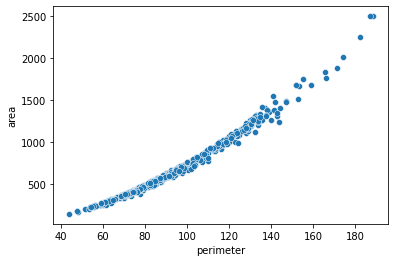

In [84]:
sns.scatterplot(x='perimeter', y='area', data=df)

<AxesSubplot:>

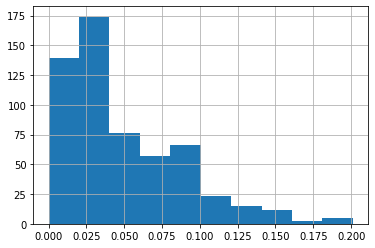

In [85]:
df['concave points'].hist()

**4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados?** 

**5. Intenta superarte en el score cambiando las features de los algoritmos.**

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify=y)

print(X_train.shape)
print(X_test.shape)

(455, 10)
(114, 10)


<AxesSubplot:>

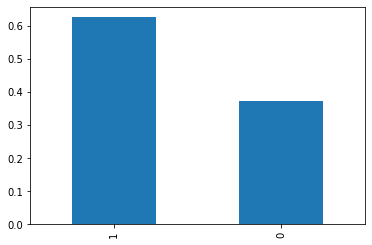

In [99]:
y_train.value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:>

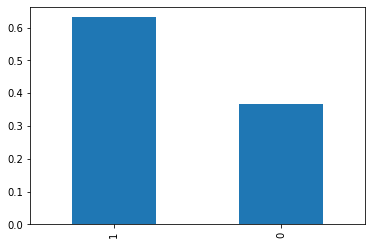

In [100]:
y_test.value_counts(normalize=True).plot(kind='bar')

In [104]:
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('classifier', KNeighborsClassifier())])


logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(0, 4, 10)
    }

random_forest_params = {
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': range(5, 10),
    'classifier__weights': ['uniform', 'distance']
    }

svm_params = {
    'classifier': [SVC()],
    'classifier__kernel':('linear', 'rbf', 'poly'), 
    'classifier__C':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
    'classifier__degree': [2, 3 , 4],
    'classifier__coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
    'classifier__gamma': ('scale', 'auto')
    }


# Create space of candidate learning algorithms and their hyperparameters
search_space = [
    logistic_params,
    random_forest_params,
    svm_params
    ]

In [105]:
clf = GridSearchCV(pipe, 
                   param_grid=search_space, 
                   cv=8, 
                   n_jobs=-1,
                   verbose=1)



In [106]:
clf.fit(X_train, y_train)

Fitting 8 folds for each of 1182 candidates, totalling 9456 fits


c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


80 fits failed out of a total of 9456.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\sit

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'cla...
                          'classifier__n_neighbors': range(5, 10),
                          'classifier__weights': ['uniform', 'distance']},
                         {'classifier': [SVC(C=0.7, coef0=100, kernel='poly')],
                          'classifier__C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                            0.9],
                          'classifier__coef0': [-10.0, -1.0, 0.0, 0.1, 0.5, 1,
                                                10, 1

In [110]:
# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", clf.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

model = clf.best_estimator_


############################

best estimator: SVC(C=0.7, coef0=100, kernel='poly')

############################

clf.best_params_ {'classifier': SVC(C=0.7, coef0=100, kernel='poly'), 'classifier__C': 0.7, 'classifier__coef0': 100, 'classifier__degree': 3, 'classifier__gamma': 'scale', 'classifier__kernel': 'poly'}

############################

clf.best_score 0.9515977443609023


In [116]:
df_res = pd.DataFrame(clf.cv_results_)
# df_res = df_res.dropna()
df_res = df_res.sort_values(by='rank_test_score')
df_res.head(100)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__n_neighbors,param_classifier__weights,param_classifier__coef0,param_classifier__degree,param_classifier__gamma,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
887,0.590643,0.258184,0.004187,0.001089,"SVC(C=0.7, coef0=100, kernel='poly')",0.7,NaN,NaN,NaN,100,3,auto,poly,"{'classifier': SVC(C=0.7, coef0=100, kernel='p...",0.982456,0.964912,0.964912,0.929825,0.929825,0.982456,0.929825,0.928571,0.951598,0.022944,1
884,0.572509,0.237602,0.004197,0.000724,"SVC(C=0.7, coef0=100, kernel='poly')",0.7,NaN,NaN,NaN,100,3,scale,poly,"{'classifier': SVC(C=0.7, coef0=100, kernel='p...",0.982456,0.964912,0.964912,0.929825,0.929825,0.982456,0.929825,0.928571,0.951598,0.022944,1
1157,0.032170,0.006874,0.005858,0.002319,"SVC(C=0.7, coef0=100, kernel='poly')",0.9,NaN,NaN,NaN,10,3,auto,poly,"{'classifier': SVC(C=0.7, coef0=100, kernel='p...",0.964912,0.947368,0.964912,0.929825,0.947368,0.929825,0.947368,0.964286,0.949483,0.013609,3
1154,0.036083,0.012747,0.007534,0.003678,"SVC(C=0.7, coef0=100, kernel='poly')",0.9,NaN,NaN,NaN,10,3,scale,poly,"{'classifier': SVC(C=0.7, coef0=100, kernel='p...",0.964912,0.947368,0.964912,0.929825,0.947368,0.929825,0.947368,0.964286,0.949483,0.013609,3
455,0.510556,0.412208,0.006173,0.003148,"SVC(C=0.7, coef0=100, kernel='poly')",0.4,NaN,NaN,NaN,100,3,auto,poly,"{'classifier': SVC(C=0.7, coef0=100, kernel='p...",0.947368,0.964912,0.964912,0.912281,0.947368,0.982456,0.929825,0.946429,0.949444,0.020470,5
452,0.500072,0.390534,0.004864,0.001900,"SVC(C=0.7, coef0=100, kernel='poly')",0.4,NaN,NaN,NaN,100,3,scale,poly,"{'classifier': SVC(C=0.7, coef0=100, kernel='p...",0.947368,0.964912,0.964912,0.912281,0.947368,0.982456,0.929825,0.946429,0.949444,0.020470,5
1028,0.653044,0.295070,0.003522,0.000602,"SVC(C=0.7, coef0=100, kernel='poly')",0.8,NaN,NaN,NaN,100,3,scale,poly,"{'classifier': SVC(C=0.7, coef0=100, kernel='p...",0.982456,0.964912,0.964912,0.929825,0.929825,0.982456,0.912281,0.928571,0.949405,0.025605,7
1031,0.714420,0.347886,0.004036,0.000471,"SVC(C=0.7, coef0=100, kernel='poly')",0.8,NaN,NaN,NaN,100,3,auto,poly,"{'classifier': SVC(C=0.7, coef0=100, kernel='p...",0.982456,0.964912,0.964912,0.929825,0.929825,0.982456,0.912281,0.928571,0.949405,0.025605,7
599,0.527132,0.151447,0.003655,0.001023,"SVC(C=0.7, coef0=100, kernel='poly')",0.5,NaN,NaN,NaN,100,3,auto,poly,"{'classifier': SVC(C=0.7, coef0=100, kernel='p...",0.964912,0.964912,0.964912,0.929825,0.947368,0.982456,0.912281,0.928571,0.949405,0.022399,7
596,0.543147,0.213661,0.004740,0.001859,"SVC(C=0.7, coef0=100, kernel='poly')",0.5,NaN,NaN,NaN,100,3,scale,poly,"{'classifier': SVC(C=0.7, coef0=100, kernel='p...",0.964912,0.964912,0.964912,0.929825,0.947368,0.982456,0.912281,0.928571,0.949405,0.022399,7


In [117]:
df_res['param_classifier'].unique()

array([SVC(C=0.7, coef0=100, kernel='poly'), LogisticRegression(),
       KNeighborsClassifier()], dtype=object)

In [121]:
type(df_res['params'][0])

dict

In [123]:
df_res.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier', 'param_classifier__C', 'param_classifier__penalty',
       'param_classifier__n_neighbors', 'param_classifier__weights',
       'param_classifier__coef0', 'param_classifier__degree',
       'param_classifier__gamma', 'param_classifier__kernel', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [126]:
df_res[~df_res['param_classifier__n_neighbors'].isnull()].head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__n_neighbors,param_classifier__weights,param_classifier__coef0,param_classifier__degree,param_classifier__gamma,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
24,0.024657,0.005736,0.021174,0.009140,KNeighborsClassifier(),NaN,NaN,7,uniform,NaN,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.894737,0.947368,0.929825,0.929825,0.947368,0.964912,0.929825,0.928571,0.934054,0.019158,298
28,0.024634,0.007926,0.024005,0.007207,KNeighborsClassifier(),NaN,NaN,9,uniform,NaN,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.877193,0.947368,0.929825,0.947368,0.947368,0.964912,0.929825,0.928571,0.934054,0.024452,298
29,0.021099,0.006019,0.012239,0.003560,KNeighborsClassifier(),NaN,NaN,9,distance,NaN,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.894737,0.947368,0.929825,0.929825,0.947368,0.964912,0.929825,0.910714,0.931822,0.020649,744
25,0.030453,0.018511,0.012073,0.002566,KNeighborsClassifier(),NaN,NaN,7,distance,NaN,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.894737,0.947368,0.929825,0.929825,0.947368,0.964912,0.929825,0.910714,0.931822,0.020649,744
27,0.030812,0.013763,0.025859,0.016425,KNeighborsClassifier(),NaN,NaN,8,distance,NaN,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.894737,0.947368,0.929825,0.912281,0.964912,0.964912,0.929825,0.892857,0.929590,0.026634,865
26,0.026143,0.019831,0.034118,0.014990,KNeighborsClassifier(),NaN,NaN,8,uniform,NaN,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.877193,0.929825,0.929825,0.929825,0.947368,0.964912,0.929825,0.910714,0.927436,0.024054,871
23,0.025252,0.009848,0.022528,0.016022,KNeighborsClassifier(),NaN,NaN,6,distance,NaN,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.894737,0.947368,0.912281,0.912281,0.964912,0.964912,0.929825,0.875000,0.925164,0.030514,975
22,0.024775,0.012009,0.026753,0.012803,KNeighborsClassifier(),NaN,NaN,6,uniform,NaN,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.877193,0.929825,0.929825,0.912281,0.929825,0.947368,0.929825,0.928571,0.923089,0.019443,976
20,0.025734,0.010548,0.029951,0.010651,KNeighborsClassifier(),NaN,NaN,5,uniform,NaN,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.894737,0.929825,0.912281,0.912281,0.947368,0.947368,0.929825,0.910714,0.923050,0.017537,977
21,0.027371,0.014197,0.023010,0.023219,KNeighborsClassifier(),NaN,NaN,5,distance,NaN,NaN,NaN,NaN,"{'classifier': KNeighborsClassifier(), 'classi...",0.894737,0.929825,0.912281,0.912281,0.947368,0.947368,0.929825,0.892857,0.920818,0.019937,992


In [127]:
df_res[~df_res['param_classifier__penalty'].isnull()].head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__n_neighbors,param_classifier__weights,param_classifier__coef0,param_classifier__degree,param_classifier__gamma,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
1,0.058919,0.018668,0.009543,0.002905,LogisticRegression(),1.0,l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.929825,0.929825,0.929825,0.929825,0.947368,0.964912,0.912281,0.946429,0.936286,0.014952,271
5,0.056104,0.033446,0.014465,0.020492,LogisticRegression(),7.742637,l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.929825,0.929825,0.947368,0.912281,0.912281,0.947368,0.912281,0.946429,0.929707,0.015060,808
15,0.096519,0.036172,0.009041,0.008324,LogisticRegression(),1291.549665,l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.929825,0.929825,0.947368,0.912281,0.912281,0.964912,0.912281,0.928571,0.929668,0.017549,809
9,0.107609,0.024657,0.007779,0.004018,LogisticRegression(),59.948425,l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.929825,0.929825,0.929825,0.912281,0.929825,0.964912,0.912281,0.928571,0.929668,0.015199,809
17,0.118578,0.035161,0.009450,0.005921,LogisticRegression(),3593.813664,l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.929825,0.929825,0.947368,0.912281,0.912281,0.964912,0.912281,0.928571,0.929668,0.017549,809
19,0.092102,0.012734,0.009829,0.003706,LogisticRegression(),10000.0,l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.929825,0.929825,0.947368,0.912281,0.912281,0.964912,0.912281,0.928571,0.929668,0.017549,809
3,0.049494,0.010677,0.009160,0.002469,LogisticRegression(),2.782559,l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.929825,0.929825,0.929825,0.912281,0.912281,0.947368,0.912281,0.946429,0.927514,0.013528,866
13,0.110779,0.019412,0.009092,0.003095,LogisticRegression(),464.158883,l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.929825,0.929825,0.929825,0.912281,0.912281,0.964912,0.912281,0.928571,0.927475,0.016248,867
11,0.090695,0.021043,0.008794,0.002965,LogisticRegression(),166.810054,l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.929825,0.929825,0.929825,0.912281,0.912281,0.964912,0.912281,0.928571,0.927475,0.016248,867
7,0.077865,0.026163,0.007958,0.004539,LogisticRegression(),21.544347,l2,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(), 'classifi...",0.929825,0.929825,0.929825,0.912281,0.912281,0.947368,0.912281,0.928571,0.925282,0.011552,876


In [109]:
y_train.mean()

0.6263736263736264

In [130]:
print('CV Score:', clf.best_score_)

CV Score: 0.9515977443609023


In [129]:
from sklearn.metrics import accuracy_score
y_hat = model.predict(X_test)
acc = accuracy_score(y_pred=y_hat, y_true=y_test)

print('Resultado en TEST:', acc)

Resultado en TEST: 0.9824561403508771


In [141]:
acc_tr = accuracy_score(y_pred=model.predict(X_train),
                        y_true=y_train)
print(acc_tr)

0.9824175824175824


# Other scorings

In [144]:
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('classifier', KNeighborsClassifier())])


logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(0, 4, 10)
    }

random_forest_params = {
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': range(5, 10),
    'classifier__weights': ['uniform', 'distance']
    }

svm_params = {
    'classifier': [SVC()],
    'classifier__kernel':('linear', 'rbf', 'poly'), 
    'classifier__C':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
    }


# Create space of candidate learning algorithms and their hyperparameters
search_space = [
    logistic_params,
    random_forest_params,
    svm_params
    ]

clf2 = GridSearchCV(pipe, 
                   param_grid=search_space, 
                   cv=5, 
                   n_jobs=-1,
                   verbose=1,
                   scoring=['accuracy', 'f1_macro'],
                   refit='f1_macro')


In [145]:
clf2.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


50 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\alber\AppData\Local\Programs\Python\Python37\lib\site

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': range(5, 10),
                          'classifier__weights': ['uniform', 'distance']},
                         {'classifier': [SVC(C=0.8)],
                          'classifier__C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                            0.9],
                          'classifier__kernel': ('linear', 'rb

In [148]:
df_res2=pd.DataFrame(clf2.cv_results_).sort_values(by=['rank_test_f1_macro', 'rank_test_accuracy'])

In [153]:
df_res2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__penalty,param_classifier__n_neighbors,param_classifier__weights,param_classifier__kernel,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro
49,0.020633,0.005545,0.017447,0.014692,SVC(C=0.8),0.8,NaN,NaN,NaN,rbf,"{'classifier': SVC(C=0.8), 'classifier__C': 0....",0.956044,0.945055,0.945055,0.945055,0.934066,0.945055,0.006950,1,0.951801,0.939309,0.941644,0.940171,0.927701,0.940125,0.007664,1
52,0.037509,0.022677,0.019313,0.011691,SVC(C=0.8),0.9,NaN,NaN,NaN,rbf,"{'classifier': SVC(C=0.8), 'classifier__C': 0....",0.956044,0.934066,0.945055,0.945055,0.934066,0.942857,0.008223,2,0.951801,0.926613,0.941644,0.940171,0.927701,0.937586,0.009416,2
46,0.015942,0.001972,0.025319,0.021095,SVC(C=0.8),0.7,NaN,NaN,NaN,rbf,"{'classifier': SVC(C=0.8), 'classifier__C': 0....",0.945055,0.934066,0.945055,0.945055,0.934066,0.940659,0.005383,3,0.940171,0.926613,0.941644,0.940171,0.927701,0.935260,0.006647,3
40,0.026387,0.008047,0.032601,0.024401,SVC(C=0.8),0.5,NaN,NaN,NaN,rbf,"{'classifier': SVC(C=0.8), 'classifier__C': 0....",0.934066,0.923077,0.945055,0.945055,0.934066,0.936264,0.008223,4,0.928683,0.915033,0.941644,0.940171,0.927701,0.930646,0.009675,4
43,0.031927,0.015296,0.010922,0.004893,SVC(C=0.8),0.6,NaN,NaN,NaN,rbf,"{'classifier': SVC(C=0.8), 'classifier__C': 0....",0.934066,0.923077,0.945055,0.945055,0.934066,0.936264,0.008223,4,0.928683,0.915033,0.941644,0.940171,0.927701,0.930646,0.009675,4


In [152]:
model2 = clf2.best_estimator_
clf2.best_score_

0.9401252675815686

In [155]:
from sklearn.metrics import f1_score
y_hat_tr = model2.predict(X_train)
y_hat = model2.predict(X_test)

f1_tr = f1_score(y_pred=y_hat_tr, y_true=y_train, average='macro')
f1_ts = f1_score(y_pred=y_hat, y_true=y_test, average='macro')

print("F1 en TRAIN: {:.4f}".format(f1_tr))
print("F1 en TEST: {:.4f}".format(f1_ts))

F1 en TRAIN: 0.9496
F1 en TEST: 0.9516
